***

## Pandas第二课作业

####  作业提交说明：
- 位置：作业文件统一放置于/0.Teacher/Exercise/Pandas2/下
- 文件名：请先复制该notebook文件，并重新命名为(课程名)+(您姓名的全拼)，并按要求完成后保存
- 时间：课程结束后的第二天前提交。
- 注意：请勿抄袭，移动，修改，删除其他同学和原始空白的练习文件。


## 作业
- 作业所需数据文件位于0.Teacher/data目录下
***


#### 1.读入NVDA.csv中的数据


In [2]:
%config ZMQInteractiveShell.ast_node_interactivity = 'all'
%pprint
%matplotlib inline

Pretty printing has been turned OFF


In [3]:
import pandas as pd
data=pd.read_csv('../Data/NVDA.csv', index_col='Date', parse_dates=['Date'])
data.head()
data.info()

Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1999-01-22  1.750000  1.953125  1.552083  1.640625   1.523430  67867200
1999-01-25  1.770833  1.833333  1.640625  1.812500   1.683028  12762000
1999-01-26  1.833333  1.869792  1.645833  1.671875   1.552448   8580000
1999-01-27  1.677083  1.718750  1.583333  1.666667   1.547611   6109200
1999-01-28  1.666667  1.677083  1.651042  1.661458   1.542776   5688000

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4654 entries, 1999-01-22 to 2017-07-20
Data columns (total 6 columns):
Open         4654 non-null float64
High         4654 non-null float64
Low          4654 non-null float64
Close        4654 non-null float64
Adj Close    4654 non-null float64
Volume       4654 non-null int64
dtypes: float64(5), int64(1)
memory usage: 254.5 KB


In [4]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  4654.000000  4654.000000  4654.000000  4654.000000  4654.000000   
mean     18.872888    19.222090    18.513574    18.879564    18.091126   
std      22.025278    22.346668    21.662627    22.048935    22.093697   
min       1.395833     1.421875     1.333333     1.364583     1.267107   
25%       8.510000     8.755000     8.245261     8.505000     7.897462   
50%      13.810000    14.090000    13.500000    13.814167    12.832797   
75%      19.770000    20.129999    19.505000    19.789167    18.774976   
max     166.330002   168.500000   164.610001   167.500000   167.500000   

             Volume  
count  4.654000e+03  
mean   1.632563e+07  
std    1.204002e+07  
min    4.920000e+05  
25%    8.721475e+06  
50%    1.373830e+07  
75%    2.041408e+07  
max    2.307714e+08

#### 2.请计算nvda股票Adj Close每天的log return    对数收益率

In [5]:
import numpy as np
data['log_return'] = np.log(data['Adj Close']/data['Adj Close'].shift(1))
data['log_return'].head(10)

Date
1999-01-22         NaN
1999-01-25    0.099630
1999-01-26   -0.080762
1999-01-27   -0.003121
1999-01-28   -0.003129
1999-01-29   -0.048164
1999-02-01    0.019545
1999-02-02   -0.080581
1999-02-03    0.020762
1999-02-04    0.053346
Name: log_return, dtype: float64

#### 3.请找出nvda股票涨幅最大的10天

In [6]:
data.head()
data['amount_of_increase'] = (data['Adj Close'] - data['Adj Close'].shift(1)) / data['Adj Close']
data_top10 = data['amount_of_increase'].sort_values(ascending = False).iloc[:10]
data.head()
data_top10

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1999-01-22  1.750000  1.953125  1.552083  1.640625   1.523430  67867200   
1999-01-25  1.770833  1.833333  1.640625  1.812500   1.683028  12762000   
1999-01-26  1.833333  1.869792  1.645833  1.671875   1.552448   8580000   
1999-01-27  1.677083  1.718750  1.583333  1.666667   1.547611   6109200   
1999-01-28  1.666667  1.677083  1.651042  1.661458   1.542776   5688000   

            log_return  
Date                    
1999-01-22         NaN  
1999-01-25    0.099630  
1999-01-26   -0.080762  
1999-01-27   -0.003121  
1999-01-28   -0.003129

Open      High       Low     Close  Adj Close    Volume  \
Date                                                                      
1999-01-22  1.750000  1.953125  1.552083  1.640625   1.523430  67867200   
1999-01-25  1.770833  1.833333  1.640625  1.812500   1.683028  12762000   
1999-01-26  1.833333  1.869792  1.645833  1.671875   1.552448   8580000   
1999-01-27  1.677083  1.718750  1.583333  1.666667   1.547611   6109200   
1999-01-28  1.666667  1.677083  1.651042  1.661458   1.542776   5688000   

            log_return  amount_of_increase  
Date                                        
1999-01-22         NaN                 NaN  
1999-01-25    0.099630            0.094828  
1999-01-26   -0.080762           -0.084112  
1999-01-27   -0.003121           -0.003125  
1999-01-28   -0.003129           -0.003134

Date
2000-03-07    0.297824
2003-05-09    0.248479
2001-01-03    0.234824
2016-11-11    0.229624
2000-03-13    0.209380
2000-12-22    0.204991
2000-12-08    0.185930
2000-04-05    0.182004
2003-02-14    0.180233
1999-08-19    0.175115
Name: amount_of_increase, dtype: float64

#### 4. 将这十天的股票信息都输出来

In [7]:
data_top10_info = data.sort_values(by = 'amount_of_increase',ascending = False).iloc[:10]
data_top10_info

Open       High        Low      Close  Adj Close     Volume  \
Date                                                                           
2000-03-07   6.250000   7.270833   5.979167   6.942708   6.446771   48805200   
2003-05-09   6.276667   7.176667   6.100000   7.123333   6.614493  230771400   
2001-01-03   4.833333   6.572917   4.708333   6.520833   6.055031   22759200   
2016-11-11  79.510002  88.769997  78.500000  87.970001  87.635475   54335100   
2000-03-13   8.916667  12.500000   8.833333  12.437500  11.549053   60379200   
2000-12-22   5.020833   6.375000   5.020833   5.843750   5.426314   23727000   
2000-12-08   7.447917   8.333333   6.752600   8.291667   7.699371   21334800   
2000-04-05   6.312500   8.125000   5.989583   7.640625   7.094833   15990000   
2003-02-14   3.740000   4.016667   3.650000   4.013333   3.726649   88721100   
1999-08-19   1.994792   2.364583   1.927083   2.260417   2.098948   49174800   

            log_return  amount_of_increase  
Date                                        
2000-03-07    0.353572            0.297824  
2003-05-09    0.285656            0.248479  
2001-01-03    0.267650            0.234824  
2016-11-11    0.260876            0.229624  
2000-03-13    0.234938            0.209380  
2000-12-22    0.229402            0.204991  
2000-12-08    0.205709            0.185930  
2000-04-05    0.200898            0.182004  
2003-02-14    0.198735            0.180233  
1999-08-19    0.192511            0.175115

#### 5把英伟达每个月最后一天的股价记录下来，做成一张新的月线图，然后把Adj Close画成一张图

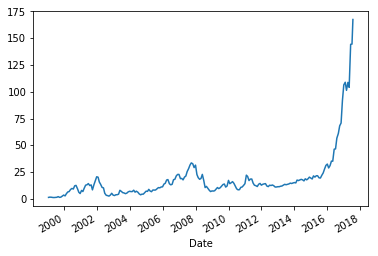

In [14]:
import matplotlib.pyplot as plt
data['year'] = data.index.year
data['month'] = data.index.month
data_year = data.groupby(['year','month'])
per_month_lastday = data_year.tail(1)
per_month_lastday["Adj Close"].plot()
    

#### 6.使用concat方法把英伟达的Adj Close与其他三只股票拼接在一起

In [12]:
Nvda = pd.read_csv(r'../Data/NVDA.csv', index_col='Date', parse_dates=['Date'])
Apple= pd.read_csv(r'../Data/APPLE.csv', index_col='Date', parse_dates=['Date'])
Goog = pd.read_csv(r'../Data/GOOG.csv', index_col='Date', parse_dates=['Date'])
Df4  = pd.read_csv(r'../Data/600028.SS.csv', index_col='Date', parse_dates=['Date'])
nvda = Nvda['Adj Close']
apple = Apple['Adj Close']
goog = Goog['Adj Close']
df4 = Df4['Adj Close']
frame = [nvda,apple,goog,df4]
total_4 = pd.concat(frame,axis = 1)
total_4.columns = ['nvda','apple','goog','df4']
total_4
#total_4.head()

nvda       apple        goog   df4
Date                                                
1980-12-12         NaN    0.423252         NaN   NaN
1980-12-15         NaN    0.401170         NaN   NaN
1980-12-16         NaN    0.371726         NaN   NaN
1980-12-17         NaN    0.380927         NaN   NaN
1980-12-18         NaN    0.391969         NaN   NaN
1980-12-19         NaN    0.415892         NaN   NaN
1980-12-22         NaN    0.436134         NaN   NaN
1980-12-23         NaN    0.454536         NaN   NaN
1980-12-24         NaN    0.478460         NaN   NaN
1980-12-26         NaN    0.522625         NaN   NaN
1980-12-29         NaN    0.529986         NaN   NaN
1980-12-30         NaN    0.517104         NaN   NaN
1980-12-31         NaN    0.502382         NaN   NaN
1981-01-02         NaN    0.507903         NaN   NaN
1981-01-05         NaN    0.496862         NaN   NaN
1981-01-06         NaN    0.474779         NaN   NaN
1981-01-07         NaN    0.454536         NaN   NaN
1981-01-08         NaN    0.445336         NaN   NaN
1981-01-09         NaN    0.469258         NaN   NaN
1981-01-12         NaN    0.465578         NaN   NaN
1981-01-13         NaN    0.449016         NaN   NaN
1981-01-14         NaN    0.450856         NaN   NaN
1981-01-15         NaN    0.460057         NaN   NaN
1981-01-16         NaN    0.456377         NaN   NaN
1981-01-19         NaN    0.483980         NaN   NaN
1981-01-20         NaN    0.469258         NaN   NaN
1981-01-21         NaN    0.478460         NaN   NaN
1981-01-22         NaN    0.483980         NaN   NaN
1981-01-23         NaN    0.482140         NaN   NaN
1981-01-26         NaN    0.474779         NaN   NaN
...                ...         ...         ...   ...
2017-07-12  162.509995  145.740005  943.830017   NaN
2017-07-13  160.630005  147.770004  947.159973   NaN
2017-07-14  164.949997  149.039993  955.989990   NaN
2017-07-17  164.250000  149.559998  953.419983   NaN
2017-07-18  165.960007  150.080002  965.400024   NaN
2017-07-19  165.100006  151.020004  970.890015   NaN
2017-07-20  167.500000  150.339996  968.150024   NaN
2018-07-09         NaN         NaN         NaN  6.41
2018-07-10         NaN         NaN         NaN  6.51
2018-07-11         NaN         NaN         NaN  6.38
2018-07-12         NaN         NaN         NaN  6.35
2018-07-13         NaN         NaN         NaN  6.34
2018-07-16         NaN         NaN         NaN  6.33
2018-07-17         NaN         NaN         NaN  6.20
2018-07-18         NaN         NaN         NaN  6.21
2018-07-19         NaN         NaN         NaN  6.25
2018-07-20         NaN         NaN         NaN  6.39
2018-07-23         NaN         NaN         NaN  6.43
2018-07-24         NaN         NaN         NaN  6.52
2018-07-25         NaN         NaN         NaN  6.54
2018-07-26         NaN         NaN         NaN  6.56
2018-07-27         NaN         NaN         NaN  6.62
2018-07-30         NaN         NaN         NaN  6.60
2018-07-31         NaN         NaN         NaN  6.76
2018-08-01         NaN         NaN         NaN  6.65
2018-08-02         NaN         NaN         NaN  6.52
2018-08-03         NaN         NaN         NaN  6.58
2018-08-06         NaN         NaN         NaN  6.51
2018-08-07         NaN         NaN         NaN  6.79
2018-08-08         NaN         NaN         NaN  6.73

[9254 rows x 4 columns]

#### 7.从Google有数据的那一天起开始画出四只股票的Adj Close折线图


In [33]:
goog_nan = total_4['goog'].dropna().index[0]
goog_nan
ix = total_4.index.get_loc(goog_nan)  # 获取索引
ix

Timestamp('2004-08-19 00:00:00')

5978

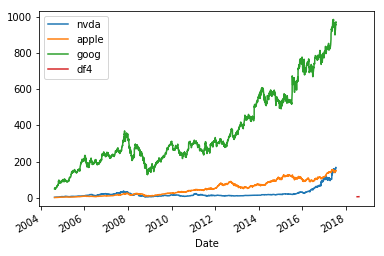

In [32]:
total_4[ix:].plot()